In [2]:
import pickle 
import numpy
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def rolling(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [43]:
cyc_dmala_energies = pickle.load(open("figs/ebm_sample/cyc_dmala_cycles_250_stepsize_2.0_initbal_1.0/energies.pickle", "rb"))
cyc_dmala_hops = pickle.load(open("figs/ebm_sample/cyc_dmala_cycles_250_stepsize_2.0_initbal_1.0/hops.pickle", "rb"))
cyc_dmala_a_s = pickle.load(open("figs/ebm_sample/cyc_dmala_cycles_250_stepsize_2.0_initbal_1.0/a_s.pickle", "rb"))

cyc_dmala_burnin_energies = pickle.load(open("figs/ebm_sample/cyc_dmala_cycles_250_stepsize_2.0_initbal_1.0_adapt_burnin/energies.pickle", "rb"))
cyc_dmala_burnin_hops = pickle.load(open("figs/ebm_sample/cyc_dmala_cycles_250_stepsize_2.0_initbal_1.0_adapt_burnin/hops.pickle", "rb"))
cyc_dmala_burnin_a_s = pickle.load(open("figs/ebm_sample/cyc_dmala_cycles_250_stepsize_2.0_initbal_1.0_adapt_burnin/a_s.pickle", "rb"))

cyc_dula_burnin_energies = pickle.load(open("figs/ebm_sample/cyc_dula_cycles_250_stepsize_2.0_initbal_1.0_adapt_burnin_lr_0.9/energies.pickle", "rb"))
cyc_dula_burnin_hops = pickle.load(open("figs/ebm_sample/cyc_dula_cycles_250_stepsize_2.0_initbal_1.0_adapt_burnin_lr_0.9/hops.pickle", "rb"))


dmala_energies = pickle.load(open("figs/ebm_sample/dmala_stepsize_0.2_0.5/energies.pickle", "rb"))
dmala_hops = pickle.load(open("figs/ebm_sample/dmala_stepsize_0.2_0.5/hops.pickle", "rb"))

dula_energies = pickle.load(open("figs/ebm_sample/dula_stepsize_0.1_0.5/energies.pickle", "rb"))
dula_hops = pickle.load(open("figs/ebm_sample/dula_stepsize_0.1_0.5/hops.pickle", "rb"))

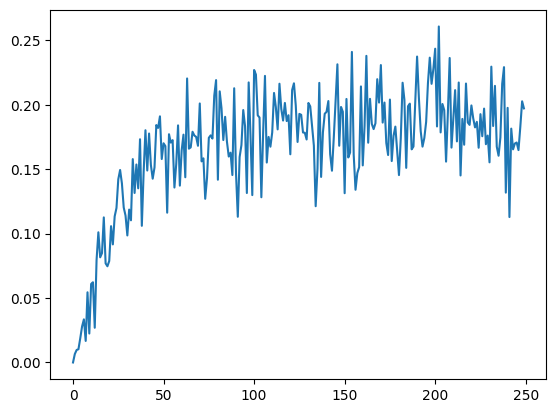

In [44]:
a_s_means = [cyc_dmala_a_s[(i)*20 + 0] for i in range(250)]
plt.plot(a_s_means)

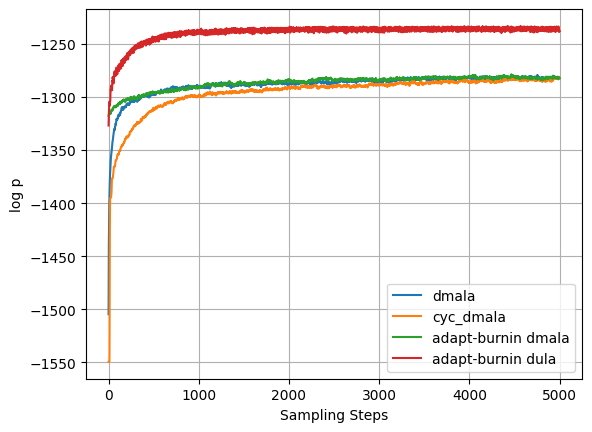

In [45]:
plt.plot(dmala_energies, label="dmala")
plt.plot(cyc_dmala_energies, label="cyc_dmala")
plt.plot(cyc_dmala_burnin_energies, label="adapt-burnin dmala")
plt.plot(cyc_dula_burnin_energies, label="adapt-burnin dula")
plt.ylabel("log p")
plt.xlabel("Sampling Steps")
plt.grid()
plt.legend()



Text(0.5, 1.0, 'Adaptive Increases Hops, step idx = 0')

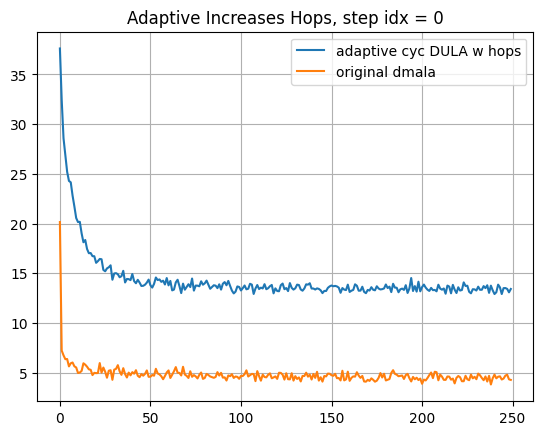

In [47]:
step_num = 0
plt.plot(cyc_dula_burnin_hops[step_num::20], label='adaptive cyc DULA w hops')
plt.plot(dmala_hops[step_num::20], label='original dmala')
plt.legend()
plt.grid()
plt.title(f"Adaptive Increases Hops, step idx = {step_num}")

Text(0.5, 1.0, 'Adaptive Increases Hops, step idx = 10')

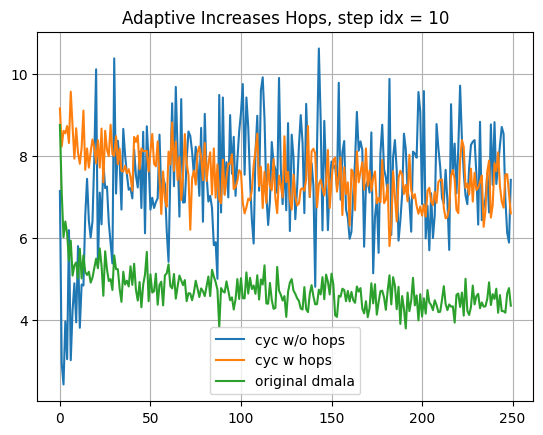

In [34]:
step_num = 10
plt.plot(cyc_dmala_hops[step_num::20], label='cyc w/o hops')
plt.plot()
plt.plot(cyc_dmala_burnin_hops[step_num::20], label='cyc w hops')
plt.plot(dmala_hops[step_num::20], label='original dmala')
plt.legend()
plt.grid()
plt.title(f"Adaptive Increases Hops, step idx = {step_num}")

In [38]:
cyc_dmala_energies = pickle.load(open("figs/ebm_sample/cyc_dmala_cycles_250_stepsize_2.0_initbal_1.0_adapt_burnin/energies.pickle", "rb"))
cyc_dmala_hops = pickle.load(open("figs/ebm_sample/cyc_dmala_cycles_250_stepsize_2.0_initbal_1.0_adapt_burnin/hops.pickle", "rb"))
cyc_dmala_a_s = pickle.load(open("figs/ebm_sample/cyc_dmala_cycles_250_stepsize_2.0_initbal_1.0_adapt_burnin/a_s.pickle", "rb"))



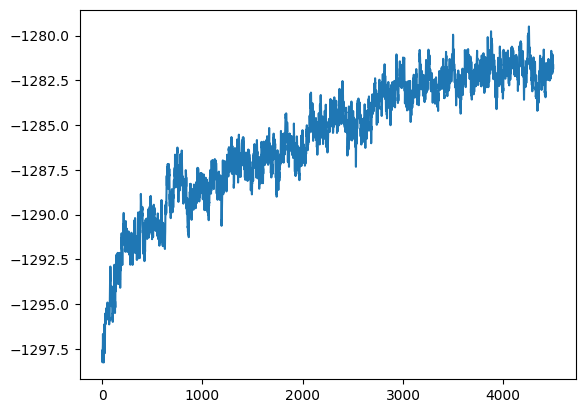

In [41]:
plt.plot(dmala_energies[500:])

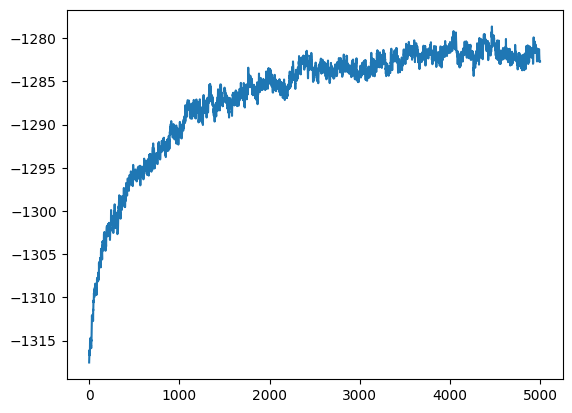

In [42]:
plt.plot(cyc_dmala_energies)

In [76]:
cyc_dula_burnin_energies = pickle.load(open("figs/ebm_sample/cyc_dula_cycles_100_stepsize_2.0_initbal_1.0_adapt_burnin_lr_0.9/energies.pickle", "rb"))
cyc_dula_burnin_hops = pickle.load(open("figs/ebm_sample/cyc_dula_cycles_100_stepsize_2.0_initbal_1.0_adapt_burnin_lr_0.9/hops.pickle", "rb"))


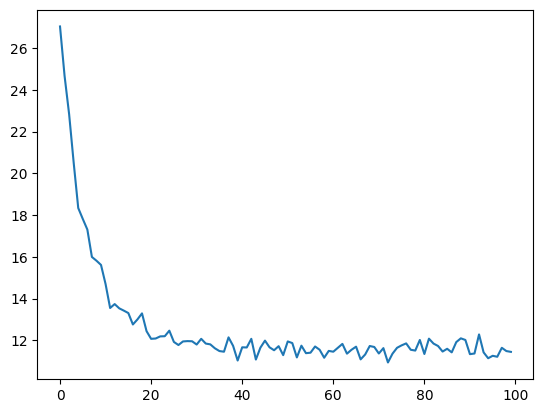

In [78]:
plt.plot(cyc_dula_burnin_hops[0::50])

In [83]:
cyc_dula_burnin_res = pickle.load(open("figs/ebm_sample/cyc_dula_cycles_100_stepsize_2.0_initbal_1.0_adapt_burnin_lr_0.9/burnin_res.pickle", "rb"))


In [1]:
cyc_dula_burnin_res['step-adapt-hist']['a_s']

NameError: name 'cyc_dula_burnin_res' is not defined